# Potential player finder (English Premier League)
Our Idea is to run a clustering model on a dataset to find out players with similar playing style as Kevin DeBruyne. Kevin has an exceptional record in the premier league. This year also he's having a very good season so far. My idea is to find players who are similar to KDB and visualize the entire process in this notebook

# Table of Contents
1. [Glossary of Dataset](#Glossary-of-the-dataset)
2. [Importing Dataset and Libraries](#Importing-Dataset-and-Libraries)
3. [Overview of the Dataset](#Overview-of-the-Dataset)
4. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
5. [Feature Engineering](#Feature-Engineering)
6. [Exploratory Data Analysis (EDA) ](#Exploratory-Data-Analysis-(EDA) )
7. [Data Analysis and Modeling](#Data-Analysis-and-Modeling)
8. [Findings](#Findings)

# Glossary of the dataset
### General Terms

| Term       | Definition |
|------------|------------|
| Rk         | Rank: This is a count of the rows from top to bottom. It is recalculated following the sorting of a column. |
| Nation     | Nationality of the player. First, we check our records in international play at the senior level. Then youth level. Then citizenship presented on Wikipedia. Finally, we use their birthplace when available. |
| Pos        | Position: Position most commonly played by the player. |
| GK         | Goalkeepers |
| DF         | Defenders |
| MF         | Midfielders |
| FW         | Forwards |
| FB         | Fullbacks |
| LB         | Left Backs |
| RB         | Right Backs |
| CB         | Center Backs |
| DM         | Defensive Midfielders |
| CM         | Central Midfielders |
| LM         | Left Midfielders |
| RM         | Right Midfielders |
| WM         | Wide Midfielders |
| LW         | Left Wingers |
| RW         | Right Wingers |
| AM         | Attacking Midfielders |
| Age        | Age at season start. Given on August 1 for winter leagues and February 1 for summer leagues. |
| Born       | Year of birth |
| 90s        | 90s Played: Minutes played divided by 90 |


### SCA Types

| Term   | Definition |
|--------|------------|
| SCA    | Shot-Creating Actions: The two offensive actions directly leading to a shot, such as passes, take-ons, and drawing fouls. Note: A single player can receive credit for multiple actions, and the shot-taker can also receive credit. |
| SCA90  | Shot-Creating Actions/90: Shot-Creating Actions per 90 minutes. Minimum 30 minutes played per squad game to qualify as a leader. |
| PassLive | SCA (Live-ball Pass) - Completed live-ball passes that lead to a shot attempt. |
| PassDead | SCA (Dead-ball Pass) - Completed dead-ball passes that lead to a shot attempt. Includes free kicks, corner kicks, kick-offs, throw-ins, and goal kicks. |
| TO    | SCA (Take-On) - Successful take-ons that lead to a shot attempt. |
| Sh    | SCA (Shot) - Shots that lead to another shot attempt. |
| Fld   | SCA (Fouls Drawn) - Fouls drawn that lead to a shot attempt. |
| Def   | SCA (Defensive Action) - Defensive actions that lead to a shot attempt. |

### GCA Types

| Term   | Definition |
|--------|------------|
| GCA    | Goal-Creating Actions: The two offensive actions directly leading to a goal, such as passes, take-ons, and drawing fouls. Note: A single player can receive credit for multiple actions, and the shot-taker can also receive credit. |
| GCA90  | Goal-Creating Actions/90: Goal-Creating Actions per 90 minutes. Minimum 30 minutes played per squad game to qualify as a leader. |
| PassLive | GCA (Live-ball Pass) - Completed live-ball passes that lead to a goal. |
| PassDead | GCA (Dead-ball Pass) - Completed dead-ball passes that lead to a goal. Includes free kicks, corner kicks, kick-offs, throw-ins, and goal kicks. |
| TO    | GCA (Take-On) - Successful take-ons that lead to a goal. |
| Sh    | GCA (Shot) - Shots that lead to another goal-scoring shot. |
| Fld   | GCA (Fouls Drawn) - Fouls drawn that lead to a goal. |
| Def   | GCA (Defensive Action) - Defensive actions that lead to a goal. |



# Importing Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import random
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/kaggle/input/epl-22-23-player-stats/epl_2022-23.csv")

# Overview of the Dataset

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive2,PassDead3,Drib4,Sh5,Fld6,Def7
0,1,Brenden Aaronson,us USA,"MF,FW",Leeds United,21,2000,26.4,95,3.60,57,17,7,5,8,1,7,0.27,3,1,0,1,1,1
1,2,George Abbott,eng ENG,MF,Tottenham,16,2005,0.0,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0
2,3,Che Adams,sct SCO,FW,Southampton,26,1996,22.1,57,2.57,44,1,2,5,5,0,7,0.32,5,0,0,0,2,0
3,4,Tyler Adams,us USA,MF,Leeds United,23,1999,24.0,43,1.79,42,0,0,0,1,0,1,0.04,1,0,0,0,0,0
4,5,Tosin Adarabioyo,eng ENG,DF,Fulham,24,1997,23.2,18,0.78,15,0,0,3,0,0,0,0.00,0,0,0,0,0,0


# Data Cleaning and Preprocessing

In [4]:
df = df.rename(columns={'PassLive': 'PassLive_sca', 'PassDead': 'PassDead_sca','Drib': 'Drib_sca', 'Sh': 'Sh_sca', 'Fld': 'Fld_sca', 'Def': 'Def_sca'})
df = df.rename(columns={'PassLive2': 'PassLive_gca', 'PassDead3': 'PassDead_gca','Drib4': 'Drib_gca', 'Sh5': 'Sh_gca', 'Fld6': 'Fld_gca', 'Def7': 'Def_gca'})

df.columns.values

array(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'SCA', 'SCA90', 'PassLive_sca', 'PassDead_sca', 'Drib_sca',
       'Sh_sca', 'Fld_sca', 'Def_sca', 'GCA', 'GCA90', 'PassLive_gca',
       'PassDead_gca', 'Drib_gca', 'Sh_gca', 'Fld_gca', 'Def_gca'],
      dtype=object)

In [5]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca
0,1,Brenden Aaronson,us USA,"MF,FW",Leeds United,21,2000,26.4,95,3.60,57,17,7,5,8,1,7,0.27,3,1,0,1,1,1
1,2,George Abbott,eng ENG,MF,Tottenham,16,2005,0.0,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0
2,3,Che Adams,sct SCO,FW,Southampton,26,1996,22.1,57,2.57,44,1,2,5,5,0,7,0.32,5,0,0,0,2,0
3,4,Tyler Adams,us USA,MF,Leeds United,23,1999,24.0,43,1.79,42,0,0,0,1,0,1,0.04,1,0,0,0,0,0
4,5,Tosin Adarabioyo,eng ENG,DF,Fulham,24,1997,23.2,18,0.78,15,0,0,3,0,0,0,0.00,0,0,0,0,0,0


In [6]:
df['Player'] = df['Player'].str.split('\\', expand=True)
df['Nation'] = df['Nation'].str.split(' ', expand=True)
df['Pos'] = df['Pos'].str[:2]

In [7]:
df['Pass SCA Ratio'] = df['PassLive_sca']/df['SCA']
df['Deadball SCA Ratio'] = df['PassDead_sca']/df['SCA']
df['Dribble SCA Ratio'] = df['Drib_sca']/df['SCA']
df['Shot SCA Ratio'] = df['Sh_sca']/df['SCA']
df['Fouls Drawn SCA Ratio'] = df['Fld_sca']/df['SCA']
df['Defense SCA Ratio'] = df['Def_sca']/df['SCA']

# Feature Engineering

In [8]:
sca_features = ['Pass SCA Ratio', 'Deadball SCA Ratio', 'Dribble SCA Ratio', 'Shot SCA Ratio', 'Fouls Drawn SCA Ratio', 'Defense SCA Ratio']

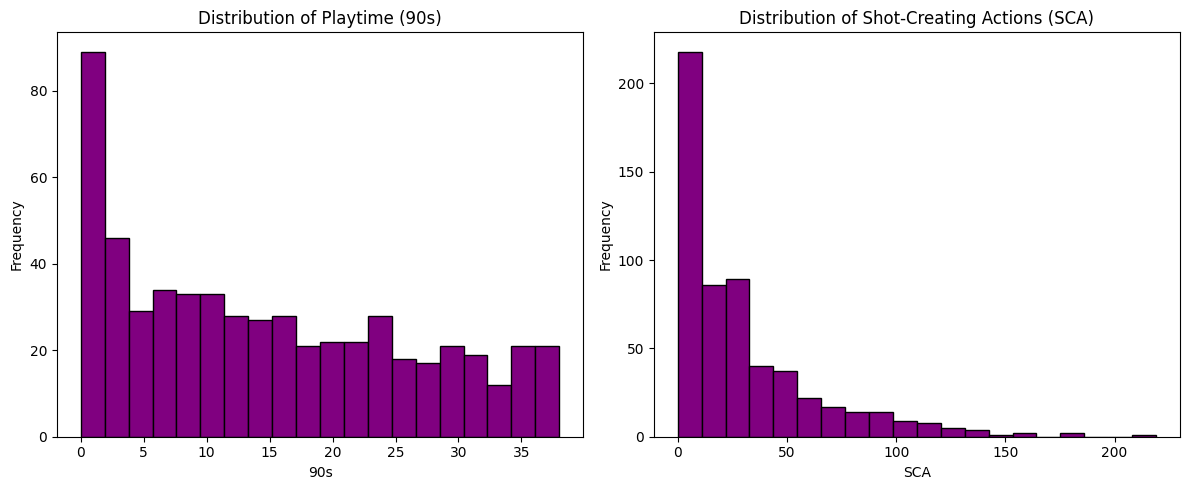

In [9]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for '90s' in the first subplot with purple bars and black outline
axs[0].hist(df['90s'], bins=20, color='purple', edgecolor='black')
axs[0].set_xlabel('90s')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Playtime (90s)')

# Plot histogram for 'SCA' in the second subplot with purple bars and black outline
axs[1].hist(df['SCA'], bins=20, color='purple', edgecolor='black')
axs[1].set_xlabel('SCA')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Shot-Creating Actions (SCA)')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the side-by-side histograms with outlines
plt.show()


In [10]:
new_df = df[(df['90s'] > 5) & (df['SCA'] > 30)]

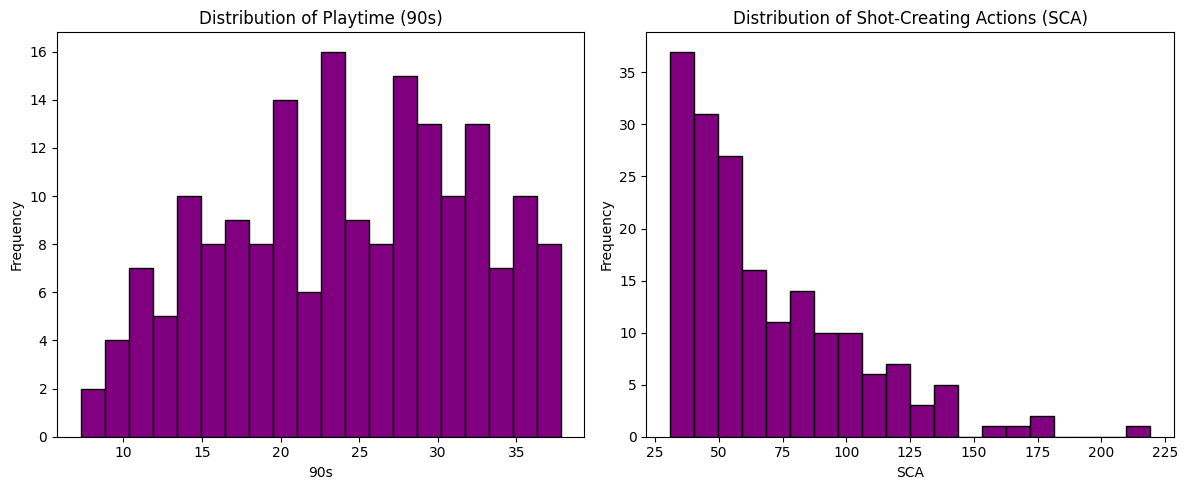

In [11]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for '90s' in the first subplot with purple bars and black outline
axs[0].hist(new_df['90s'], bins=20, color='purple', edgecolor='black')
axs[0].set_xlabel('90s')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Playtime (90s)')

# Plot histogram for 'SCA' in the second subplot with purple bars and black outline
axs[1].hist(new_df['SCA'], bins=20, color='purple', edgecolor='black')
axs[1].set_xlabel('SCA')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Shot-Creating Actions (SCA)')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the side-by-side histograms with outlines
plt.show()


# Exploratory Data Analysis (EDA) 

In [12]:
# Create a scatter plot to compare GCA vs SCA for all the players
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=new_df['SCA'],
    y=new_df['GCA'],
    mode='markers',
    text=new_df['Player'],  # Display player names on hover
    marker=dict(
        color='light blue',
        size=12,
        line=dict(
            color='black',  # Add black outlines
            width=1          # Adjust the outline width as needed
        )
    )
))

# Customize the layout of the scatter plot
fig.update_layout(
    title="GCA vs SCA for Players",
    xaxis_title="SCA (Shot-Creating Actions)",
    yaxis_title="GCA (Goal-Creating Actions",
    showlegend=False  # Hide the legend
)

# Show the scatter plot
fig.show()


In [13]:
# SCA types
sca_types = ["Pass SCA Ratio", "Deadball SCA Ratio", "Dribble SCA Ratio", "Shot SCA Ratio", "Fouls Drawn SCA Ratio", "Defense SCA Ratio"]

In [14]:
# Group the DataFrame by position and calculate the mean of SCA ratios for each position
avg_sca_ratios = new_df.groupby('Pos')[sca_types].mean().reset_index()

# Create a radar chart
fig = go.Figure()

for index, row in avg_sca_ratios.iterrows():
    sca_ratios = row[sca_types].tolist()
    sca_ratios += [sca_ratios[0]]  # Add the first SCA ratio at the end to close the shape

    fig.add_trace(go.Scatterpolar(
        r=sca_ratios,
        theta=sca_types,
        fill='toself',
        name=row['Pos']
    ))

# Update layout for better visibility
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Adjust the range based on your data
        )
    ),
    title="Average SCA Ratios by Position",
    height=500,  # Adjust the height to make the chart larger
    width=700  # Adjust the width to make the chart wider
)

fig.show()


In [15]:
kdb = new_df[new_df['Player'] == "Kevin De Bruyne"]
kdb

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio
127,128,Kevin De Bruyne,be BEL,MF,Manchester City,31,1991,26.9,176,6.55,120,33,8,7,5,3,31,1.15,24,3,1,1,2,0,0.681818,0.1875,0.045455,0.039773,0.028409,0.017045


In [16]:
# SCA Ratios for Pass, Deadball, Dribble, Shot, Fouls Drawn, Defense
sca_ratios = [0.660714, 0.196429, 0.017857, 0.089286, 0.017857, 0.017857]

# Add the first SCA ratio at the end to close the shape
sca_ratios += sca_ratios[:1]

# Create a radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=sca_ratios,
      theta=sca_types,
      fill='toself',
      line=dict(color='purple')
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]  # Adjust the range based on your data
    )
  )
)

fig.update_layout(title="Kevin De Bruyne's SCA Ratios")

fig.show()


# Data Analysis and Modeling

In [17]:
kmeans = KMeans(n_clusters=6, init='random', random_state=0, n_init=10)

p_kmeans = kmeans.fit_predict(new_df[sca_features])

In [18]:
p_kmeans

array([5, 0, 3, 0, 5, 0, 0, 0, 2, 3, 0, 2, 3, 2, 2, 0, 0, 0, 4, 0, 3, 3,
       0, 0, 3, 3, 2, 1, 0, 5, 5, 1, 3, 3, 3, 5, 0, 2, 3, 0, 3, 0, 3, 3,
       3, 5, 3, 5, 3, 4, 0, 3, 0, 0, 3, 3, 0, 0, 0, 5, 4, 1, 0, 5, 3, 0,
       2, 5, 3, 3, 3, 5, 3, 0, 2, 0, 0, 3, 1, 4, 2, 2, 0, 2, 2, 3, 0, 0,
       3, 3, 0, 5, 0, 5, 5, 2, 0, 5, 5, 1, 2, 0, 3, 0, 4, 3, 5, 5, 0, 3,
       4, 5, 3, 3, 2, 0, 1, 0, 2, 0, 3, 1, 5, 2, 5, 5, 3, 2, 3, 2, 3, 4,
       5, 3, 5, 3, 2, 0, 5, 0, 3, 5, 0, 0, 0, 5, 3, 0, 2, 0, 0, 0, 2, 4,
       5, 3, 3, 4, 3, 1, 5, 0, 2, 3, 2, 1, 2, 0, 3, 4, 5, 0, 4, 4, 0, 3,
       3, 4, 2, 3, 0, 0], dtype=int32)

In [19]:
new_df["Cluster"] = p_kmeans

In [20]:
new_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
0,1,Brenden Aaronson,us USA,MF,Leeds United,21,2000,26.4,95,3.60,57,17,7,5,8,1,7,0.27,3,1,0,1,1,1,0.600000,0.178947,0.073684,0.052632,0.084211,0.010526,5
2,3,Che Adams,sct SCO,FW,Southampton,26,1996,22.1,57,2.57,44,1,2,5,5,0,7,0.32,5,0,0,0,2,0,0.771930,0.017544,0.035088,0.087719,0.087719,0.000000,0
3,4,Tyler Adams,us USA,MF,Leeds United,23,1999,24.0,43,1.79,42,0,0,0,1,0,1,0.04,1,0,0,0,0,0,0.976744,0.000000,0.000000,0.000000,0.023256,0.000000,3
12,13,Thiago Alcántara,es ESP,MF,Liverpool,31,1991,13.9,41,2.94,33,0,3,1,1,3,2,0.14,2,0,0,0,0,0,0.804878,0.000000,0.073171,0.024390,0.024390,0.073171,0
14,15,Trent Alexander-Arnold,eng ENG,DF,Liverpool,23,1998,32.5,124,3.82,81,34,3,5,1,0,17,0.52,14,2,1,0,0,0,0.653226,0.274194,0.024194,0.040323,0.008065,0.000000,5


In [21]:
silhouette_avg = silhouette_score(new_df[sca_features], p_kmeans)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.30411254982954355


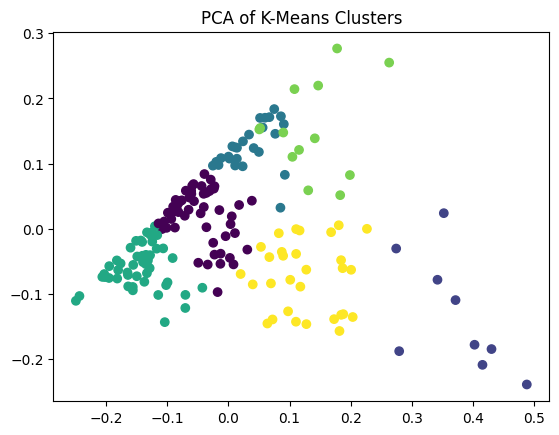

In [22]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(new_df[sca_features])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=p_kmeans)
plt.title("PCA of K-Means Clusters")
plt.show()

In [23]:
cluster_sizes = pd.Series(p_kmeans).value_counts().sort_index()
print(cluster_sizes)


0    54
1     9
2    26
3    50
4    13
5    30
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



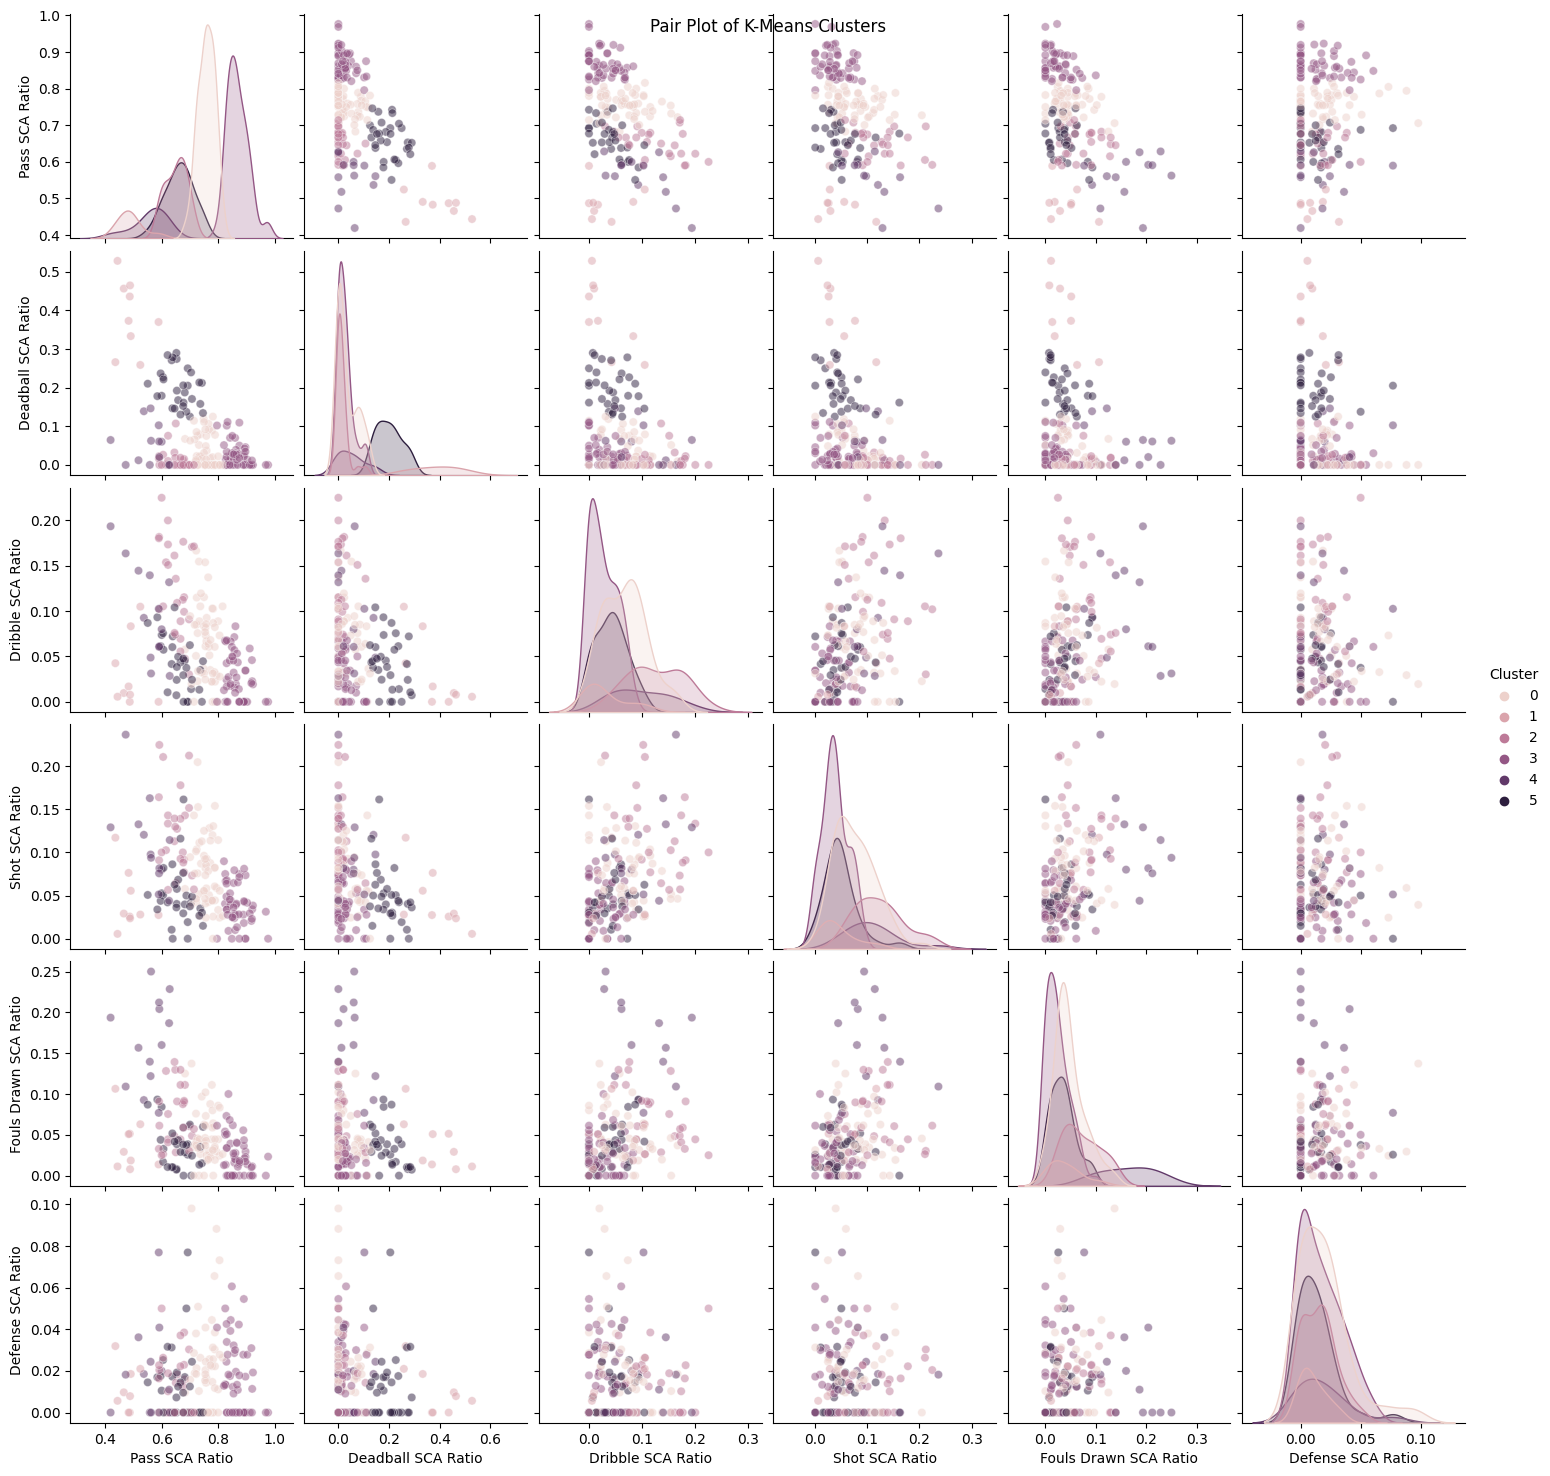

In [24]:
# Add the cluster assignments to your DataFrame
new_df['Cluster'] = p_kmeans

# Select the relevant columns for the pair plot
plot_data = new_df[sca_features + ['Cluster']]

sns.pairplot(plot_data, hue='Cluster', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of K-Means Clusters")
plt.show()


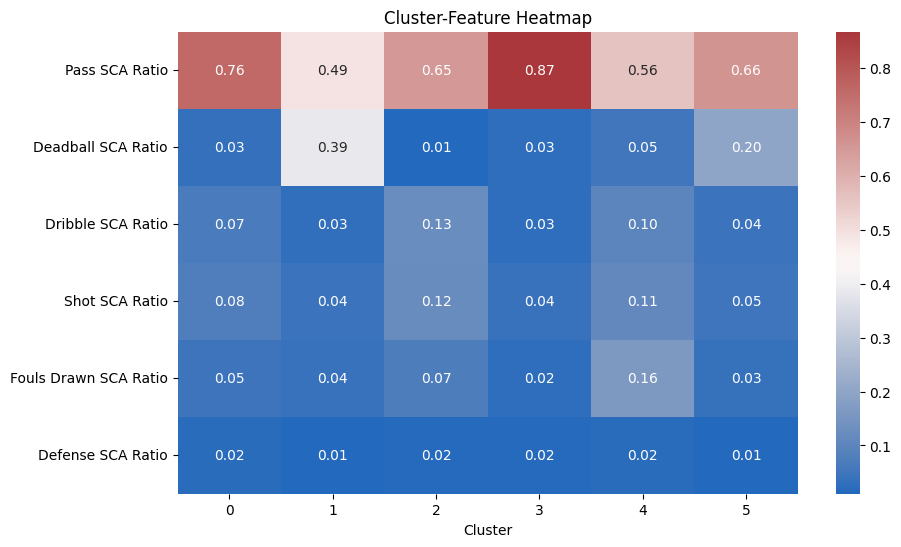

In [25]:
# Create a cluster-feature heatmap
cluster_feature_data = new_df.groupby('Cluster')[sca_features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_feature_data.T, annot=True, cmap='vlag', fmt=".2f")
plt.title("Cluster-Feature Heatmap")
plt.show()


In [26]:
new_df[new_df['Player'] == "Kevin De Bruyne"]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
127,128,Kevin De Bruyne,be BEL,MF,Manchester City,31,1991,26.9,176,6.55,120,33,8,7,5,3,31,1.15,24,3,1,1,2,0,0.681818,0.1875,0.045455,0.039773,0.028409,0.017045,5


In [27]:
cluster_5_data = new_df[new_df['Cluster'] == 5]
cluster_5_data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
0,1,Brenden Aaronson,us USA,MF,Leeds United,21,2000,26.4,95,3.60,57,17,7,5,8,1,7,0.27,3,1,0,1,1,1,0.600000,0.178947,0.073684,0.052632,0.084211,0.010526,5
14,15,Trent Alexander-Arnold,eng ENG,DF,Liverpool,23,1998,32.5,124,3.82,81,34,3,5,1,0,17,0.52,14,2,1,0,0,0,0.653226,0.274194,0.024194,0.040323,0.008065,0.000000,5
104,105,Lewis Cook,eng ENG,MF,Bournemouth,25,1997,19.1,39,2.04,27,8,0,0,1,3,4,0.21,2,1,0,0,0,1,0.692308,0.205128,0.000000,0.000000,0.025641,0.076923,5
109,110,Vladimír Coufal,cz CZE,DF,West Ham,29,1992,23.7,52,2.19,36,13,0,1,2,0,3,0.13,2,1,0,0,0,0,0.692308,0.250000,0.000000,0.019231,0.038462,0.000000,5
127,128,Kevin De Bruyne,be BEL,MF,Manchester City,31,1991,26.9,176,6.55,120,33,8,7,5,3,31,1.15,24,3,1,1,2,0,0.681818,0.187500,0.045455,0.039773,0.028409,0.017045,5
162,163,Christian Eriksen,dk DEN,MF,Manchester Utd,30,1992,22.8,71,3.12,50,17,1,3,0,0,9,0.40,6,3,0,0,0,0,0.704225,0.239437,0.014085,0.042254,0.000000,0.000000,5
165,166,Eberechi Eze,eng ENG,MF,Crystal Palace,24,1998,29.3,118,4.03,69,21,11,4,11,2,16,0.55,9,1,5,0,1,0,0.584746,0.177966,0.093220,0.033898,0.093220,0.016949,5
196,197,Morgan Gibbs-White,eng ENG,MF,Nott'ham Forest,22,2000,33.0,119,3.60,72,27,9,6,2,3,12,0.36,6,3,1,2,0,0,0.605042,0.226891,0.075630,0.050420,0.016807,0.025210,5
210,211,Pascal Groß,de GER,MF,Brighton,31,1991,36.0,138,3.83,90,40,1,5,1,1,12,0.33,10,2,0,0,0,0,0.652174,0.289855,0.007246,0.036232,0.007246,0.007246,5
220,221,Jack Harrison,eng ENG,FW,Leeds United,25,1996,30.1,114,3.79,68,27,7,5,5,2,9,0.30,6,1,1,1,0,0,0.596491,0.236842,0.061404,0.043860,0.043860,0.017544,5


In [28]:
# Create a radar chart for players in Cluster 5
fig = go.Figure()

# Iterate through each player in Cluster 5 and add their data to the radar chart
for index, row in cluster_5_data.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[sca_features].tolist() + [row[sca_features][0]],  # Repeat the first value to close the shape
        theta=sca_features + [sca_features[0]],  # Repeat the first feature to close the shape
        fill='toself',
        name=row['Player']  # Use the player's name as the label
    ))

# Customize the radar chart layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Adjust the range based on your data
        )
    )
)

# Set the title of the chart
fig.update_layout(title="Radar Chart for Players in Cluster 5")

# Show the radar chart
fig.show()

In [29]:
# Create a scatter plot to compare GCA vs SCA for players in Cluster 5
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cluster_5_data['SCA'],
    y=cluster_5_data['GCA'],
    mode='markers',
    text=cluster_5_data['Player'],  # Display player names on hover
    marker=dict(
        color='light blue',
        size=12,
        line=dict(
            color='black',  # Add black outlines
            width=1          # Adjust the outline width as needed
        ))
))

# Customize the layout of the scatter plot
fig.update_layout(
    title="GCA vs SCA for Players in Cluster 5",
    xaxis_title="SCA (Shot-Creating Actions)",
    yaxis_title="GCA (Goal-Creating Actions)",
    showlegend=False  # Hide the legend
)

# Show the scatter plot
fig.show()

In [30]:
cluster_0_data = new_df[new_df['Cluster'] == 0]
cluster_0_data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
2,3,Che Adams,sct SCO,FW,Southampton,26,1996,22.1,57,2.57,44,1,2,5,5,0,7,0.32,5,0,0,0,2,0,0.771930,0.017544,0.035088,0.087719,0.087719,0.000000,0
12,13,Thiago Alcántara,es ESP,MF,Liverpool,31,1991,13.9,41,2.94,33,0,3,1,1,3,2,0.14,2,0,0,0,0,0,0.804878,0.000000,0.073171,0.024390,0.024390,0.073171,0
17,18,Miguel Almirón,py PAR,FW,Newcastle Utd,28,1994,27.7,87,3.14,63,2,10,9,3,0,13,0.47,5,1,5,2,0,0,0.724138,0.022989,0.114943,0.103448,0.034483,0.000000,0
18,19,Julián Álvarez,ar ARG,FW,Manchester City,22,2000,16.3,52,3.20,39,0,6,5,2,0,5,0.31,2,0,1,1,1,0,0.750000,0.000000,0.115385,0.096154,0.038462,0.000000,0
23,24,Jaidon Anthony,eng ENG,MF,Bournemouth,22,1999,14.0,38,2.72,28,3,4,1,1,1,4,0.29,2,0,1,0,1,0,0.736842,0.078947,0.105263,0.026316,0.026316,0.026316,0
30,31,Stuart Armstrong,sct SCO,MF,Southampton,30,1992,15.6,50,3.20,39,1,0,6,4,0,2,0.13,1,0,0,0,1,0,0.780000,0.020000,0.000000,0.120000,0.080000,0.000000,0
55,56,Saïd Benrahma,dz ALG,FW,West Ham,26,1995,23.0,92,4.00,68,2,11,8,3,0,5,0.22,4,0,1,0,0,0,0.739130,0.021739,0.119565,0.086957,0.032609,0.000000,0
56,57,Rodrigo Bentancur,uy URU,MF,Tottenham,25,1997,16.7,34,2.04,27,0,1,2,1,3,5,0.30,2,0,0,1,0,2,0.794118,0.000000,0.029412,0.058824,0.029412,0.088235,0
61,62,Philip Billing,dk DEN,MF,Bournemouth,26,1996,30.7,54,1.76,41,2,5,5,1,0,6,0.20,4,0,0,2,0,0,0.759259,0.037037,0.092593,0.092593,0.018519,0.000000,0
70,71,Emi Buendía,ar ARG,MF,Aston Villa,25,1996,26.8,90,3.36,72,2,8,3,4,1,10,0.37,7,0,1,2,0,0,0.800000,0.022222,0.088889,0.033333,0.044444,0.011111,0


In [31]:
# Create a scatter plot to compare GCA vs SCA for players in Cluster 0
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cluster_0_data['SCA'],
    y=cluster_0_data['GCA'],
    mode='markers',
    text=cluster_0_data['Player'],  # Display player names on hover
    marker=dict(
        color='light blue',
        size=12,
        line=dict(
            color='black',  # Add black outlines
            width=1          # Adjust the outline width as needed
        ))
))

# Customize the layout of the scatter plot
fig.update_layout(
    title="GCA vs SCA for Players in Cluster 0",
    xaxis_title="SCA (Shot-Creating Actions)",
    yaxis_title="GCA (Goal-Creating Actions)",
    showlegend=False  # Hide the legend
)

# Show the scatter plot
fig.show()

In [32]:
cluster_1_data = new_df[new_df['Cluster'] == 1]
cluster_1_data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
94,95,Ben Chilwell,eng ENG,DF,Chelsea,25,1996,15.6,39,2.49,19,17,0,1,2,0,4,0.26,2,1,0,0,1,0,0.487179,0.435897,0.000000,0.025641,0.051282,0.000000,1
113,114,Aaron Cresswell,eng ENG,DF,West Ham,32,1989,24.8,73,2.94,43,27,0,2,1,0,1,0.04,0,1,0,0,0,0,0.589041,0.369863,0.000000,0.027397,0.013699,0.000000,1
207,208,Demarai Gray,jm JAM,FW,Everton,26,1996,27.9,94,3.37,41,25,4,11,10,3,5,0.18,3,2,0,0,0,0,0.436170,0.265957,0.042553,0.117021,0.106383,0.031915,1
248,249,Mathias Jensen,dk DEN,MF,Brentford,26,1996,31.1,103,3.31,48,47,1,3,3,1,13,0.42,7,4,0,1,0,1,0.466019,0.456311,0.009709,0.029126,0.029126,0.009709,1
341,342,Dwight McNeil,eng ENG,FW,Everton,22,1999,27.8,108,3.89,53,36,9,6,2,2,12,0.43,4,3,3,0,1,1,0.490741,0.333333,0.083333,0.055556,0.018519,0.018519,1
384,385,Michael Olise,fr FRA,FW,Crystal Palace,20,2001,30.5,143,4.68,75,37,15,4,9,3,13,0.43,9,4,0,0,0,0,0.524476,0.258741,0.104895,0.027972,0.062937,0.020979,1
403,404,Andreas Pereira,br BRA,MF,Fulham,26,1996,29.9,118,3.94,57,44,2,9,6,0,12,0.40,5,5,0,2,0,0,0.483051,0.372881,0.016949,0.076271,0.050847,0.000000,1
520,521,Kieran Trippier,eng ENG,DF,Newcastle Utd,31,1990,37.1,178,4.79,79,94,1,1,2,1,10,0.27,6,4,0,0,0,0,0.443820,0.528090,0.005618,0.005618,0.011236,0.005618,1
540,541,James Ward-Prowse,eng ENG,MF,Southampton,27,1994,37.5,127,3.39,62,59,1,3,1,1,9,0.24,3,3,1,2,0,0,0.488189,0.464567,0.007874,0.023622,0.007874,0.007874,1


In [33]:
# Create a scatter plot to compare GCA vs SCA for players in Cluster 1
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cluster_1_data['SCA'],
    y=cluster_1_data['GCA'],
    mode='markers',
    text=cluster_1_data['Player'],  # Display player names on hover
    marker=dict(
        color='light blue',
        size=12,
        line=dict(
            color='black',  # Add black outlines
            width=1          # Adjust the outline width as needed
        ))
))

# Customize the layout of the scatter plot
fig.update_layout(
    title="GCA vs SCA for Players in Cluster 1",
    xaxis_title="SCA (Shot-Creating Actions)",
    yaxis_title="GCA (Goal-Creating Actions)",
    showlegend=False  # Hide the legend
)

# Show the scatter plot
fig.show()

Cluster 1 seems to be full of players who usually take set-pieces

In [34]:
cluster_2_data = new_df[new_df['Cluster'] == 2]
cluster_2_data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
24,25,Michail Antonio,jm JAM,FW,West Ham,32,1990,20.3,39,1.92,24,0,6,4,5,0,9,0.44,6,0,2,1,0,0,0.615385,0.000000,0.153846,0.102564,0.128205,0.000000,2
38,39,Jordan Ayew,gh GHA,FW,Crystal Palace,30,1991,30.2,78,2.59,53,0,9,6,7,3,8,0.27,5,0,1,1,1,0,0.679487,0.000000,0.115385,0.076923,0.089744,0.038462,2
42,43,Leon Bailey,jm JAM,FW,Aston Villa,24,1997,21.9,62,2.84,40,2,10,7,3,0,8,0.37,5,0,0,3,0,0,0.645161,0.032258,0.161290,0.112903,0.048387,0.000000,2
47,48,Harvey Barnes,eng ENG,FW,Leicester City,24,1997,30.1,63,2.09,43,0,3,9,7,1,14,0.46,8,0,1,2,2,1,0.682540,0.000000,0.047619,0.142857,0.111111,0.015873,2
89,90,Julio César Enciso,py PAR,FW,Brighton,18,2004,9.0,45,5.02,28,0,9,6,2,0,7,0.78,3,0,2,1,1,0,0.622222,0.000000,0.200000,0.133333,0.044444,0.000000,2
136,137,Luis Díaz,co COL,FW,Liverpool,25,1997,11.1,41,3.70,29,0,7,3,2,0,6,0.54,3,0,2,1,0,0,0.707317,0.000000,0.170732,0.073171,0.048780,0.000000,2
217,218,Erling Haaland,no NOR,FW,Manchester City,22,2000,30.8,72,2.34,48,0,5,10,8,1,17,0.55,14,0,0,1,2,0,0.666667,0.000000,0.069444,0.138889,0.111111,0.013889,2
240,241,Alexander Isak,se SWE,FW,Newcastle Utd,22,1999,16.9,49,2.90,29,0,5,11,3,1,5,0.30,1,0,2,1,1,0,0.591837,0.000000,0.102041,0.224490,0.061224,0.020408,2
251,252,Joelinton,br BRA,MF,Newcastle Utd,25,1996,29.6,80,2.71,54,1,9,8,7,1,10,0.34,4,1,2,2,1,0,0.675000,0.012500,0.112500,0.100000,0.087500,0.012500,2
253,254,Brennan Johnson,wls WAL,FW,Nott'ham Forest,21,2001,32.6,55,1.69,36,0,6,7,5,1,11,0.34,5,0,1,3,2,0,0.654545,0.000000,0.109091,0.127273,0.090909,0.018182,2


In [35]:
# Create a scatter plot to compare GCA vs SCA for players in Cluster 2
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cluster_2_data['SCA'],
    y=cluster_2_data['GCA'],
    mode='markers',
    text=cluster_2_data['Player'],  # Display player names on hover
    marker=dict(
        color='light blue',
        size=12,
        line=dict(
            color='black',  # Add black outlines
            width=1          # Adjust the outline width as needed
        ))
))

# Customize the layout of the scatter plot
fig.update_layout(
    title="GCA vs SCA for Players in Cluster 2",
    xaxis_title="SCA (Shot-Creating Actions)",
    yaxis_title="GCA (Goal-Creating Actions)",
    showlegend=False  # Hide the legend
)

# Show the scatter plot
fig.show()

These players are usually highly likely to score goals


In [36]:
cluster_3_data = new_df[new_df['Cluster'] == 3]
cluster_3_data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
3,4,Tyler Adams,us USA,MF,Leeds United,23,1999,24.0,43,1.79,42,0,0,0,1,0,1,0.04,1,0,0,0,0,0,0.976744,0.000000,0.000000,0.000000,0.023256,0.000000,3
25,26,Antony,br BRA,FW,Manchester Utd,22,2000,20.0,74,3.69,61,0,5,3,4,1,7,0.35,6,0,1,0,0,0,0.824324,0.000000,0.067568,0.040541,0.054054,0.013514,3
39,40,Luke Ayling,eng ENG,DF,Leeds United,30,1991,22.8,40,1.75,33,0,0,3,2,2,1,0.04,1,0,0,0,0,0,0.825000,0.000000,0.000000,0.075000,0.050000,0.050000,3
73,74,Dan Burn,eng ENG,DF,Newcastle Utd,30,1992,34.6,40,1.16,35,2,0,3,0,0,3,0.09,3,0,0,0,0,0,0.875000,0.050000,0.000000,0.075000,0.000000,0.000000,3
75,76,Moisés Caicedo,ec ECU,MF,Brighton,20,2001,34.9,88,2.52,81,0,2,3,1,1,5,0.14,5,0,0,0,0,0,0.920455,0.000000,0.022727,0.034091,0.011364,0.011364,3
85,86,Casemiro,br BRA,MF,Manchester Utd,30,1992,23.6,68,2.88,61,0,0,5,2,0,8,0.34,8,0,0,0,0,0,0.897059,0.000000,0.000000,0.073529,0.029412,0.000000,3
87,88,Timothy Castagne,be BEL,DF,Leicester City,26,1995,36.2,51,1.41,44,2,1,2,1,1,5,0.14,4,0,0,1,0,0,0.862745,0.039216,0.019608,0.039216,0.019608,0.019608,3
117,118,Diogo Dalot,pt POR,DF,Manchester Utd,23,1999,23.9,52,2.17,48,0,1,2,0,1,2,0.08,2,0,0,0,0,0,0.923077,0.000000,0.019231,0.038462,0.000000,0.019231,3
121,122,Josh Dasilva,eng ENG,MF,Brentford,23,1998,15.4,42,2.72,36,1,3,1,1,0,7,0.45,5,0,1,0,1,0,0.857143,0.023810,0.071429,0.023810,0.023810,0.000000,3
123,124,Ben Davies,wls WAL,DF,Tottenham,29,1993,25.4,37,1.46,33,1,0,3,0,0,7,0.28,5,0,0,2,0,0,0.891892,0.027027,0.000000,0.081081,0.000000,0.000000,3


In [37]:
# Create a scatter plot to compare GCA vs SCA for players in Cluster 3
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cluster_3_data['SCA'],
    y=cluster_3_data['GCA'],
    mode='markers',
    text=cluster_3_data['Player'],  # Display player names on hover
    marker=dict(
        color='light blue',
        size=12,
        line=dict(
            color='black',  # Add black outlines
            width=1          # Adjust the outline width as needed
        ))
))

# Customize the layout of the scatter plot
fig.update_layout(
    title="GCA vs SCA for Players in Cluster 3",
    xaxis_title="SCA (Shot-Creating Actions)",
    yaxis_title="GCA (Goal-Creating Actions)",
    showlegend=False  # Hide the legend
)

# Show the scatter plot
fig.show()

Interesting to see this cluster mostly contains defensive midfielders and defenders


In [38]:
cluster_4_data = new_df[new_df['Cluster'] == 4]
cluster_4_data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
65,66,Jarrod Bowen,eng ENG,FW,West Ham,25,1996,35.9,108,3.01,58,15,10,13,10,2,14,0.39,6,3,0,2,3,0,0.537037,0.138889,0.092593,0.120370,0.092593,0.018519,4
170,171,João Félix,pt POR,FW,Chelsea,22,1999,10.5,31,2.96,13,2,6,4,6,0,1,0.10,1,0,0,0,0,0,0.419355,0.064516,0.193548,0.129032,0.193548,0.000000,4
199,200,Degnand Gnonto,it ITA,FW,Leeds United,18,2003,15.0,50,3.32,30,3,4,4,8,1,7,0.47,6,1,0,0,0,0,0.600000,0.060000,0.080000,0.080000,0.160000,0.020000,4
249,250,Gabriel Jesus,br BRA,FW,Arsenal,25,1997,22.9,83,3.62,43,1,12,11,13,3,12,0.52,8,0,1,1,2,0,0.518072,0.012048,0.144578,0.132530,0.156627,0.036145,4
356,357,Aleksandar Mitrović,rs SRB,FW,Fulham,27,1994,22.3,55,2.47,26,0,9,13,6,1,10,0.45,3,0,1,4,2,0,0.472727,0.000000,0.163636,0.236364,0.109091,0.018182,4
372,373,Pedro Neto,pt POR,FW,Wolves,22,2000,10.7,41,3.82,23,6,2,4,5,1,6,0.56,4,0,0,1,1,0,0.560976,0.146341,0.048780,0.097561,0.121951,0.024390,4
430,431,Richarlison,br BRA,MF,Tottenham,25,1997,11.2,35,3.12,22,0,1,4,8,0,5,0.45,3,0,0,0,2,0,0.628571,0.000000,0.028571,0.114286,0.228571,0.000000,4
501,502,Crysencio Summerville,nl NED,FW,Leeds United,20,2001,15.8,49,3.09,29,1,3,4,10,2,5,0.32,3,0,0,0,1,1,0.591837,0.020408,0.061224,0.081633,0.204082,0.040816,4
515,516,Ivan Toney,eng ENG,FW,Brentford,26,1996,32.8,66,2.01,39,4,4,5,14,0,8,0.24,3,0,1,0,4,0,0.590909,0.060606,0.060606,0.075758,0.212121,0.000000,4
548,549,Neco Williams,wls WAL,DF,Nott'ham Forest,21,2001,20.9,39,1.86,23,4,4,2,3,3,2,0.10,1,0,0,1,0,0,0.589744,0.102564,0.102564,0.051282,0.076923,0.076923,4


In [39]:
# Create a scatter plot to compare GCA vs SCA for players in Cluster 4
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cluster_4_data['SCA'],
    y=cluster_4_data['GCA'],
    mode='markers',
    text=cluster_4_data['Player'],  # Display player names on hover
    marker=dict(
        color='light blue',
        size=12,
        line=dict(
            color='black',  # Add black outlines
            width=1          # Adjust the outline width as needed
        ))
))

# Customize the layout of the scatter plot
fig.update_layout(
    title="GCA vs SCA for Players in Cluster 4",
    xaxis_title="SCA (Shot-Creating Actions)",
    yaxis_title="GCA (Goal-Creating Actions)",
    showlegend=False  # Hide the legend
)

# Show the scatter plot
fig.show()

Dribblers mostly, includes players who contribute to the attack.

In [40]:
cluster_5_data = new_df[new_df['Cluster'] == 5]
cluster_5_data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
0,1,Brenden Aaronson,us USA,MF,Leeds United,21,2000,26.4,95,3.60,57,17,7,5,8,1,7,0.27,3,1,0,1,1,1,0.600000,0.178947,0.073684,0.052632,0.084211,0.010526,5
14,15,Trent Alexander-Arnold,eng ENG,DF,Liverpool,23,1998,32.5,124,3.82,81,34,3,5,1,0,17,0.52,14,2,1,0,0,0,0.653226,0.274194,0.024194,0.040323,0.008065,0.000000,5
104,105,Lewis Cook,eng ENG,MF,Bournemouth,25,1997,19.1,39,2.04,27,8,0,0,1,3,4,0.21,2,1,0,0,0,1,0.692308,0.205128,0.000000,0.000000,0.025641,0.076923,5
109,110,Vladimír Coufal,cz CZE,DF,West Ham,29,1992,23.7,52,2.19,36,13,0,1,2,0,3,0.13,2,1,0,0,0,0,0.692308,0.250000,0.000000,0.019231,0.038462,0.000000,5
127,128,Kevin De Bruyne,be BEL,MF,Manchester City,31,1991,26.9,176,6.55,120,33,8,7,5,3,31,1.15,24,3,1,1,2,0,0.681818,0.187500,0.045455,0.039773,0.028409,0.017045,5
162,163,Christian Eriksen,dk DEN,MF,Manchester Utd,30,1992,22.8,71,3.12,50,17,1,3,0,0,9,0.40,6,3,0,0,0,0,0.704225,0.239437,0.014085,0.042254,0.000000,0.000000,5
165,166,Eberechi Eze,eng ENG,MF,Crystal Palace,24,1998,29.3,118,4.03,69,21,11,4,11,2,16,0.55,9,1,5,0,1,0,0.584746,0.177966,0.093220,0.033898,0.093220,0.016949,5
196,197,Morgan Gibbs-White,eng ENG,MF,Nott'ham Forest,22,2000,33.0,119,3.60,72,27,9,6,2,3,12,0.36,6,3,1,2,0,0,0.605042,0.226891,0.075630,0.050420,0.016807,0.025210,5
210,211,Pascal Groß,de GER,MF,Brighton,31,1991,36.0,138,3.83,90,40,1,5,1,1,12,0.33,10,2,0,0,0,0,0.652174,0.289855,0.007246,0.036232,0.007246,0.007246,5
220,221,Jack Harrison,eng ENG,FW,Leeds United,25,1996,30.1,114,3.79,68,27,7,5,5,2,9,0.30,6,1,1,1,0,0,0.596491,0.236842,0.061404,0.043860,0.043860,0.017544,5


Similar players like KDB, highly likely to provide assists/ contribute to the team scoring

# Findings

* KDB's overall stat highly depend on Pass_sca and Deadball_sca
* Kevin Tripper and Bruno Fernandes seem to have more Shot Creating Actions than KDB but less in terms of Goal Creating Actions
* Sca stats of forwards depend on almost all the feeatures of SCA. Not the case for Midfielders and Defenders.
* Cluster 1 and 4 seems to have the least amount of players indicating their game style is not very popular.
* Cluster 4 is the closest to having an even distribution in terms of SCA feature ratios.
* All the clusters are mostly depend on the Pass_sca ratio.